# Bucur Robert - Adrian
## Grupa 10LF381
### cap5 - statinf5.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.special import binom
import pandas as pd
import math
import pickle
import statsmodels.stats.power
import statsmodels.api as sm
import statsmodels.stats.multitest as mt
from sklearn import datasets

## Power

In [2]:
mu_0 = 30
mu_a = 32
alpha = 0.05
sigma = 4
n = 16
z = stats.norm.ppf(1 - alpha)
print(stats.norm.sf(mu_0 + z * sigma/np.sqrt(n), loc=mu_0, scale=sigma/np.sqrt(n)))
print(stats.norm.sf(mu_0 + z * sigma/np.sqrt(n), loc=mu_a, scale=sigma/np.sqrt(n)))

0.049999999999999954
0.6387600313123348


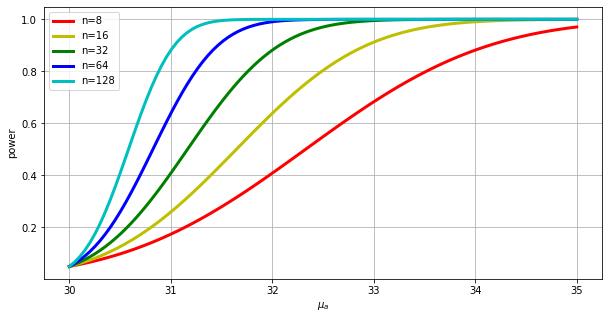

In [3]:
def power(mu_a, n):
    mu_0, alpha, sigma = 30, 0.05, 4
    z = stats.norm.ppf(1 - alpha)
    return stats.norm.sf(mu_0 + z * sigma/np.sqrt(n), loc=mu_a, scale=sigma/np.sqrt(n))

mu_a = np.linspace(30, 35, 100)

plt.figure(figsize=(10,5))
[plt.plot(mu_a, power(mu_a, n), lw=3, color=c) 
     for n,c in [(8, 'r'), (16, 'y'), (32, 'g'), (64, 'b'), (128, 'c')]
]
plt.grid()
plt.legend(['n=8', 'n=16', 'n=32', 'n=64', 'n=128'])
plt.xlabel('$\mu_a$')
plt.ylabel('power')
plt.show()

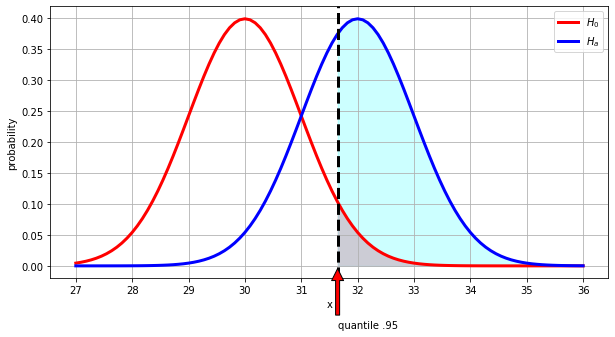

In [4]:
mu_0 = 30
mu_a = 32
sigma = 4
n = 16
alpha = 0.05

x = np.linspace(27, 36, 100)
y_0 = stats.norm.pdf(x, loc=mu_0, scale=sigma/np.sqrt(n))
y_a = stats.norm.pdf(x, loc=mu_a, scale=sigma/np.sqrt(n))
x_black = stats.norm.ppf(0.95, loc=mu_0, scale=sigma/np.sqrt(n))
x1 = np.linspace(x_black, 36, 100)

plt.figure(figsize=(10,5))
plt.plot(x, y_0, lw=3, c='r')
plt.plot(x, y_a, lw=3, c='b')
plt.legend(['$H_0$', '$H_a$'])
plt.grid()
plt.xticks(np.linspace(27, 36, 10))
plt.xlabel('x')
plt.ylabel('probability')
plt.axvline(x=x_black, c='k', linestyle='--', lw=3)
plt.annotate('quantile .95', 
            xy=(x_black, 0), 
            xytext=(x_black, -.1), 
            arrowprops = dict(facecolor='red', shrink=0.05))
plt.fill_between(x1, stats.norm.pdf(x1, loc=mu_0, scale=sigma/np.sqrt(n)), color="pink")
plt.fill_between(x1, stats.norm.pdf(x1, loc=mu_a, scale=sigma/np.sqrt(n)), color="cyan", alpha=0.2)
plt.show()

In [5]:
print(stats.norm.sf(x_black, loc=mu_a, scale=sigma/np.sqrt(n)))
print(statsmodels.stats.power.normal_power(
    effect_size=(mu_a - mu_0)/sigma, 
    nobs=16, alpha=0.05, alternative='larger')
)

0.6387600313123348
0.638760031312335


In [6]:
print('mu_0: %d, mu_a: %d' % (mu_0, mu_a))
print('sigma: ', sigma)
print('power: ', statsmodels.stats.power.ttest_power(
    effect_size=(mu_a - mu_0)/sigma, 
    nobs=16, alpha=0.05, alternative='larger'))

mu_0: 30, mu_a: 32
sigma:  4
power:  0.6040328683316007


In [7]:
print(statsmodels.stats.power.tt_solve_power(
    effect_size=(mu_a - mu_0)/sigma, 
    alpha=0.05, nobs=16, alternative='larger'))
print(statsmodels.stats.power.tt_solve_power(
    effect_size=(mu_a - mu_0)/sigma, 
    alpha=0.05, power=0.6040328, alternative='larger'))

0.6040328683316007
15.99999729935307


# Multiple tests

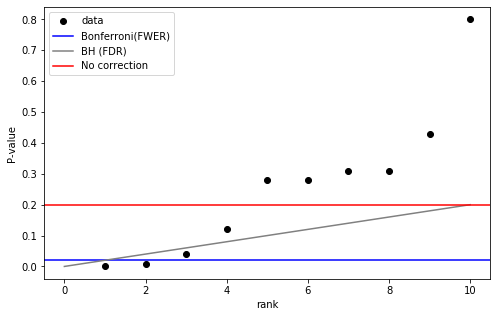

In [8]:
rank = np.array(range(10)) + 1
pValue = np.array([0.001, 0.007, 0.04, 0.12, 0.28, 0.28, 0.31, 0.31, 0.43, 0.8])
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.plot(rank, pValue, 'o', c='k')
ax.axhline(y=0.02, c='b')
ax.plot([0, 10], [0., .2], c='gray')
ax.axhline(y=0.2, c='r')
ax.set_xlabel('rank')
ax.set_ylabel('P-value')
ax.legend(['data', 'Bonferroni(FWER)', 'BH (FDR)', 'No correction'])
plt.show()

In [9]:
n = 1000
pValues = np.zeros(n)
for i in range(n):
    x = np.random.randn(20)
    y = np.random.randn(20)
    x = sm.add_constant(x)
    est = sm.OLS(y, x).fit()
    pValues[i] = est.pvalues[1]
    
print('no correction: ', np.sum(pValues < 0.05))

no correction:  46


In [10]:
res = mt.multipletests(pValues, method='bonferroni')
print('Bonferroni correction: ', np.sum(res[1] < 0.05))

res = mt.multipletests(pValues, method='fdr_bh')
print('Benjamini/Hochberg correction: ', np.sum(res[1] < 0.05))

Bonferroni correction:  0
Benjamini/Hochberg correction:  0


In [11]:
# exemplu pentru care coeficientul w al regresiei liniare este:
# 0 pentru primele 500 de situatii construite
# 2 pentru urmatoarele
n = 1000
pValues = np.zeros(n)
for i in range(n):
    x = np.random.randn(20)
    y = np.random.randn(20) if i < n//2 else (np.random.randn(20) + 2*x)
    x = sm.add_constant(x)
    est = sm.OLS(y, x).fit()
    pValues[i] = est.pvalues[1]
    
print('no correction:', np.sum(pValues < 0.05))
res = mt.multipletests(pValues, method='bonferroni')
print('corectie FWER:' , np.sum(res[1] < 0.05))

no correction: 521
corectie FWER: 481


In [12]:
df = pd.DataFrame({
    'trueStatus': ['zero'] * 500 + ['not zero'] * 500,
    'pValue': pValues
})
pd.crosstab(df.pValue < 0.05, df.trueStatus)

trueStatus,not zero,zero
pValue,,
False,0,479
True,500,21


In [13]:
df = pd.DataFrame({
    'trueStatus': ['zero'] * 500 + ['not zero'] * 500,
    'pValueAdjusted': mt.multipletests(pValues, method='bonferroni')[1]
})
pd.crosstab(df.pValueAdjusted < 0.05, df.trueStatus)

trueStatus,not zero,zero
pValueAdjusted,,
False,19,500
True,481,0


In [14]:
df = pd.DataFrame({
    'trueStatus': ['zero'] * 500 + ['not zero'] * 500,
    'pValueAdjusted': mt.multipletests(pValues, method='fdr_bh')[1]
})
pd.crosstab(df.pValueAdjusted < 0.05, df.trueStatus)

trueStatus,not zero,zero
pValueAdjusted,,
False,0,491
True,500,9


In [15]:
adjustBonf = mt.multipletests(pValues, method='bonferroni')[1]
adjustBH = mt.multipletests(pValues, method='fdr_bh')[1]

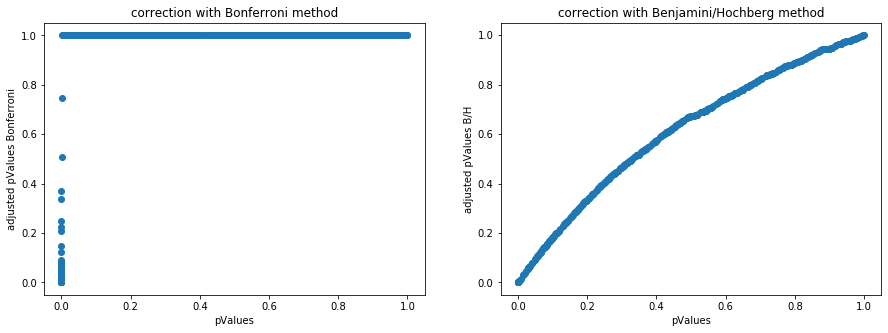

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(15, 5))
ax1.plot(pValues, adjustBonf, 'o')
ax1.set_xlabel('pValues')
ax1.set_ylabel('adjusted pValues Bonferroni')
ax1.set_title('correction with Bonferroni method')
ax2.plot(pValues, adjustBH, 'o')
ax2.set_xlabel('pValues')
ax2.set_ylabel('adjusted pValues B/H')
ax2.set_title('correction with Benjamini/Hochberg method')
plt.show()

## Bootstrap

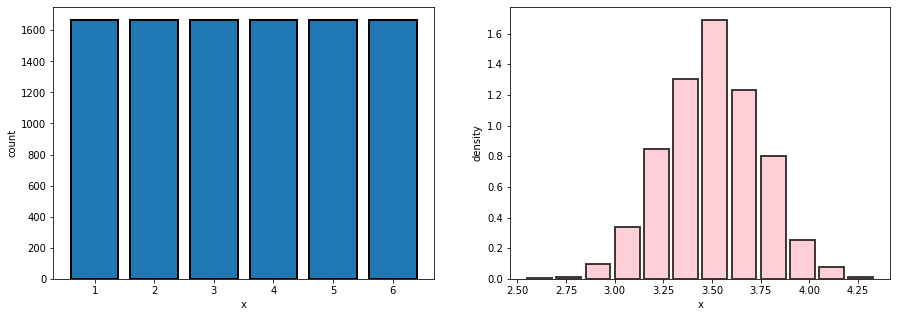

In [17]:
from functools import reduce

def roll(n):
    nosim = 10000
    x = np.random.randint(low=1, high=7, size=(nosim, n))
    return np.mean(x, axis=1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
kwargs = dict(rwidth=0.85, density=True, alpha=0.75, ec='k', linewidth=2)

ax1.bar(range(1, 7), [10000/6] * 6, linewidth=2, edgecolor='k')
ax1.set_xlabel('x')
ax1.set_ylabel('count')
ax2.hist(roll(50), bins=12, color='pink', **kwargs)
ax2.set_xlabel('x')
ax2.set_ylabel('density')
plt.show()

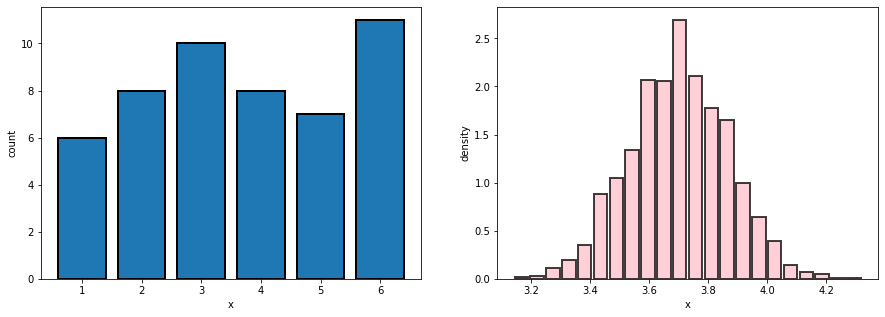

In [18]:
x = np.random.randint(low=1, high=7, size=(50))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
kwargs = dict(rwidth=0.85, density=True, alpha=0.75, ec='k', linewidth=2)

def roll(x, n):
    nosim = 10000
    x = np.random.choice(x, size=(nosim, n))
    return np.mean(x, axis=1)

l = [sum(np.array(x) == i) for i in range(1, 7)]

ax1.bar(range(1, 7), l, linewidth=2, edgecolor='k')
ax1.set_xlabel('x')
ax1.set_ylabel('count')
ax2.hist(roll(x, 100), bins=22, color='pink', **kwargs)
ax2.set_xlabel('x')
ax2.set_ylabel('density')
plt.show()

In [19]:
father_son = pd.read_csv('father_son.csv')
father_son.head()

,Unnamed: 0,fheight,sheight
0,1,65.04851,59.77827
1,2,63.25094,63.21404
2,3,64.95532,63.34242
3,4,65.75250,62.79238
4,5,61.13723,64.28113


deviatia standard:  0.10379961566567913
quantila 2.5%: 67.54999000000001
quantila 97.5%: 67.942651375


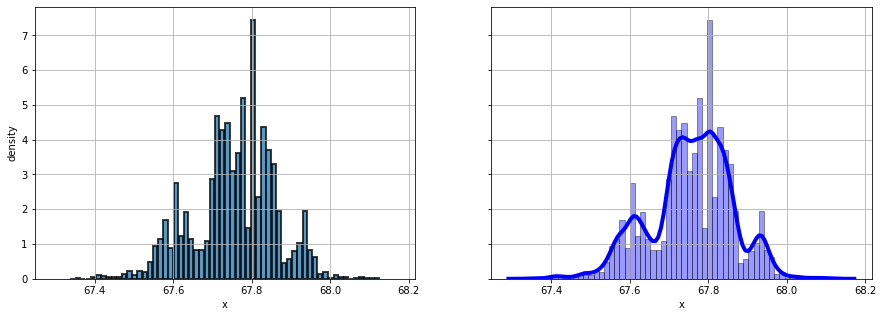

In [20]:
import seaborn

# vezi https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0

x = father_son.fheight.values
n, nosims = len(x), 10000
resamples = np.random.choice(x, size=(nosims, n), replace=True)
resampledMedians = np.median(resamples, axis=1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True, sharex=True)
kwargs = dict(rwidth=0.85, density=True, alpha=0.75, ec='k', linewidth=2)
ax1.hist(resampledMedians, **kwargs, bins=60)
ax1.grid()
ax1.set_xlabel('x')
ax1.set_ylabel('density')
seaborn.distplot(resampledMedians, hist=True, kde=True, bins=60, ax=ax2,
    color = 'blue',  hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})
ax2.grid()
ax2.set_xlabel('x')

print('deviatia standard: ', np.std(resampledMedians))
print('quantila 2.5%:', np.quantile(resampledMedians, 0.025))
print('quantila 97.5%:', np.quantile(resampledMedians, 0.975))
plt.show()


In [21]:
insect_sprays = pd.read_csv('insect_sprays.csv')
insect_sprays.head()

,Unnamed: 0,count,spray
0,1,10,A
1,2,7,A
2,3,20,A
3,4,14,A
4,5,14,A


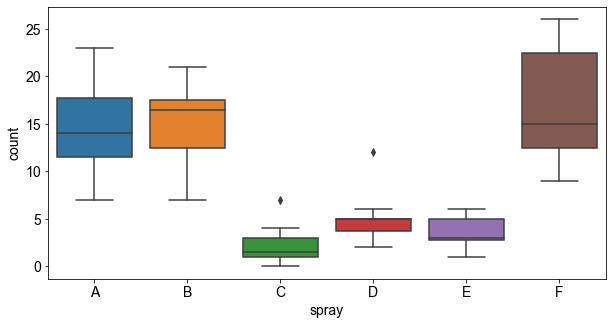

In [22]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
seaborn.set_style('whitegrid')
seaborn.boxplot(x='spray', y='count', data=insect_sprays, ax=ax)
plt.show()

In [23]:
def testStat(a, b, groups):
    return np.mean([y for (x, y) in zip(a, b) if x == groups[0]]) \
        - np.mean([y for (x, y) in zip(a, b) if x == groups[1]])
    
groups = ['B', 'C']
subdata = insect_sprays[insect_sprays.spray.isin(groups)]

observedStat = testStat(subdata['spray'], subdata['count'], groups)

n = subdata['spray'].values.shape[0]
nosims = 10000
permutations = np.array(list(map(
    lambda x: testStat(x, subdata['count'], groups),
    [np.random.choice(subdata['spray'].values, n) for i in range(nosims)]
)))

print(observedStat)
pValue = np.mean(permutations > observedStat)
print(pValue)

13.25
0.0


deviatia standard:  3.1340376862736083
quantila 2.5%: -6.083333333333333
quantila 97.5%: 6.1571428571428575


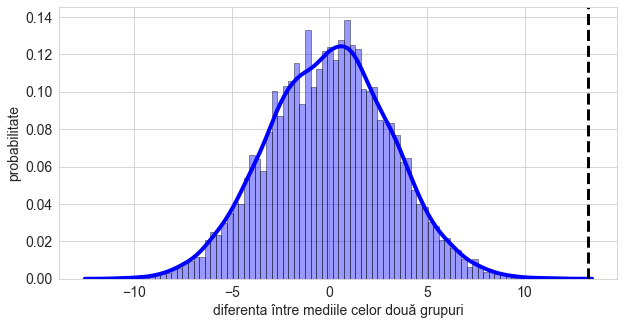

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
seaborn.distplot(permutations, hist=True, kde=True, bins=80, ax=ax,
    color = 'blue',  hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})
ax.grid(True)
ax.set_xlabel('diferenta între mediile celor două grupuri')
ax.set_ylabel('probabilitate')
ax.axvline(x=observedStat, lw=3, c='k', linestyle='--')

print('deviatia standard: ', np.std(permutations))
print('quantila 2.5%:', np.quantile(permutations, 0.025))
print('quantila 97.5%:', np.quantile(permutations, 0.975))
plt.show()

# Laborator

Q1. Power este o probabilitate pentru care se presupune că este adevărată:

1. ipoteza nulă $H_0$
2. ipoteza alternativă $H_a$
3. ambele

In [25]:
# R. 2

Q2. Pe măsură ce dimensiunea sample-ului crește, restul menținîndu-se constant, ce se întâmplă cu power?

1. se mărește
2. se micșorează
3. rămâne la fel
4. nu putem preciza

In [26]:
# R. 1

Q3. Ce se întâmplă cu power pe măsură ce $\mu_a$ se îndepărtează față de $\mu_0$?

In [27]:
# R. Pe masura ce μa se indeparteaza de μ0, power creste.

Q4. În contextul calculului power, ce este 'effect size'?

In [28]:
# R. Effect size reprezinta cantitatea (μa − μ0) / σ, diferenta de medii in unitati de deviatie standard (unit free).

Q5. Presupunem că în cazul unei testări A/B, o schemă de publicitate a determinat o medie de 10 achiziții pe zi pentru un sample de 100 de zile, în timp ce pentru cealaltă a determinat o medie de 11 achiziții pe zi, pentru același interval de 100 de zile. Presupunem o deviație standard de 4 achiziții pe zi pentru ambele distribuții. 

Media de 10 achiziții/zi este $\mu_0$ asociată ipotezei nule, iar pentru ipoteza alternativă $\mu_a = 11$. Care ar fi power pentru un test Z one-sided cu confidența de 95% ($\alpha=5\%$), în care presupunem că media achizițiilor a crescut la ipoteza alternativă?

In [29]:
# R.
n     = 100
mu_0  = 10
mu_a  = 11 
alpha = 0.05
sigma = 4

power = statsmodels.stats.power.ttest_power(effect_size=(mu_a - mu_0) / sigma, nobs=n, alpha=alpha, alternative='larger')
print('Power:', power)

Power: 0.7989854657792195


Q5. Se dorește crearea unui studiu pentru detectarea valorii medii pe 4 ani a pierderii de volum a creierului, pierdere medie de 0.01 $mm^3$. Presupunem că deviația standard pe media acestor 4 ani este de 0.04 $mm^3$. Care este numărul de voluntari pe care trebuie să se facă studiul pentru un test 5% vs. ipoteza nulă că nu se pierde deloc volum, pentru a atinge power de 80% ?

In [30]:
# R.
mu_0  = 0
mu_a  = 0.01
alpha = 0.05
sigma = 0.04
power = 0.80

n     = statsmodels.stats.power.tt_solve_power(effect_size=(mu_a - mu_0) / sigma, power=power, alpha=alpha, alternative='larger')
print('Number of volunteers:', round(n))

Number of volunteers: 100


Q6. Un studiu a observat asocierea mai multor factor nutriționali cu cancerul mamar (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4166692/). Au fost calculate următoarele p-values:

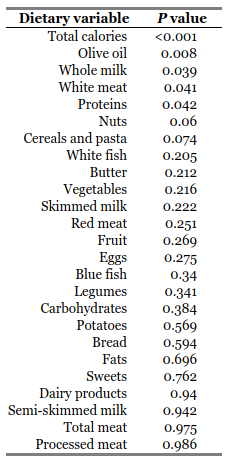

Considerăm un test cu 95% confidență.

a) Fără corecție, care factori sunt relevanți statistic?

b) Aplicați corecția Bonferroni pe aceste p-values. Care din factori este statistic semnificativ?

c) Aplicați corecția Benjamini/Hochberg. Care factori sunt relevanți statistic în acest caz?

Reprezentați grafic p-values cu corecția Bonferroni vs. p-values fără corecție, respectiv p-values cu corecția Benjamini/Hochberg vs. p-values fără corecție. Puneți pe ambele grafice și pragul de 0.05 ca să vedem ce rejectăm și ce nu.

In [31]:
# R. a)
factors = {
    0.001 : 'Total calories',
    0.008 : 'Olive oil',
    0.039 : 'Whole milk',
    0.041 : 'White meat',
    0.042 : 'Proteins',
    0.060 : 'Nuts',
    0.074 : 'Cearels and pasta',
    0.205 : 'White fish',
    0.212 : 'Butter',
    0.216 : 'Vegetables',
    0.222 : 'Skimmed milk',
    0.251 : 'Red meat',
    0.269 : 'Fruit',
    0.275 : 'Eggs',
    0.340 : 'Blue fish',
    0.341 : 'Legumes',
    0.384 : 'Carbohydrates',
    0.569 : 'Potatoes',
    0.594 : 'Bread',
    0.696 : 'Fats',
    0.762 : 'Sweets',
    0.940 : 'Dairy products',
    0.942 : 'Semi-skimmed milk',
    0.975 : 'Total meat',
    0.986 : 'Processed meat'
}

def print_factors(values):
    for element in values:
        print(factors[element])

pValues = np.array(list(factors.keys()))

no_correction = pValues < 0.05

print('- Relevant factors:')
print_factors(pValues[no_correction])

- Relevant factors:
Total calories
Olive oil
Whole milk
White meat
Proteins


In [32]:
# R. b)
adjustBonf = mt.multipletests(pValues, method='bonferroni')[1]

print('- Relevant factors:')
print_factors(pValues[adjustBonf < 0.05])

- Relevant factors:
Total calories


- Relevant factors:
Total calories


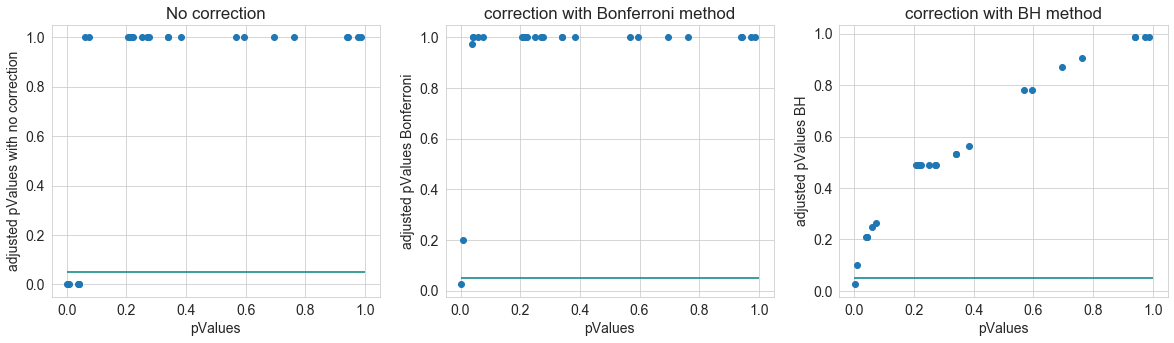

In [33]:
# R. c)
adjustBH = mt.multipletests(pValues, method='fdr_bh')[1]

print('- Relevant factors:')
print_factors(pValues[adjustBH < 0.05])

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, figsize=(20, 5))

ax1.hlines(y=0.05, xmin=0, xmax=1, color='teal')
ax1.plot(pValues, np.logical_not(no_correction), 'o')
ax1.set_xlabel('pValues')
ax1.set_ylabel('adjusted pValues with no correction')
ax1.set_title('No correction')

ax2.hlines(y=0.05, xmin=0, xmax=1, color='teal')
ax2.plot(pValues, adjustBonf, 'o')
ax2.set_xlabel('pValues')
ax2.set_ylabel('adjusted pValues Bonferroni')
ax2.set_title('correction with Bonferroni method')

ax3.hlines(y=0.05, xmin=0, xmax=1, color='teal')
ax3.plot(pValues, adjustBH, 'o')
ax3.set_xlabel('pValues')
ax3.set_ylabel('adjusted pValues BH')
ax3.set_title('correction with BH method')

fig.show()

Q7. Ce folosește procedura bootstrap pentru a estima distribuția sampled a unei statistici?

In [34]:
# R. Principiul bootstrap sugereaza ca putem folosi distributia definita de, date pentru a aproxima sampling distribution.

Q8. Ce fac testele de resampling? Care este ipoteza nulă și care este ipoteza alternativă? Care este p-value?

In [35]:
# R. Testele de resampling re-extrag din sample-ul extras initial sample-uri de aceeasi dimensiune, cu inlocuire.
# Ipoteza nula presupune ca distributiile observatiilor din fiecare grup sa fie identice (una si aceeasi distributie).
# Ipoteza alternativa presupune ca distributiile observatiilor sa fie diferite .
# P-value este media dintre valorile permutarilor, acolo unde acestea sunt mai mari decat statisticile observate.

Q9. Realizați două grupuri de numere eșantionate din două distribuții, de medii 10 și respectiv 15, și dispersie 2. Etichetați fiecare sample cu numele grupului, A sau B. Grupurile au dimensiunile 40 și respectiv 50.

Ridicați whiskers plots pentru ambele grupuri.

a) Realizați testul de permutare pentru a arăta dacă numerele sunt sau nu extrase din aceeași distribuție. Stabiliți care este ipoteza nulă și care este ipoteza alternativă. Afișați distribuția mediei resample-urilor. Ce p-value obțineți pentru statistica de tip medie? Care este rezultatul testului ipotezei?

b) Creșteți dispersia grupurilor de la 2 la 10 și reluați experimentul. Ce constatați?

In [36]:
def get_numbers(dispersion: int) -> pd.DataFrame:
    numbers_a = np.random.normal(loc=10, scale=dispersion, size=40)
    numbers_b = np.random.normal(loc=15, scale=dispersion, size=50)

    data_a = pd.DataFrame(data={'Group': 'A', 'Number': numbers_a})
    data_b = pd.DataFrame(data={'Group': 'B', 'Number': numbers_b})
    data   = pd.concat([data_a, data_b])

    return data

In [37]:
def draw_whiskers(data: pd.DataFrame):
    plt.rcParams.update({'font.size': 14})
    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    seaborn.set_style('whitegrid')
    seaborn.boxplot(x='Group', y='Number', data=data, ax=ax)

    plt.show()

In [38]:
# R. a)
# H0 presupune ca   distributiile observatiilor din fiecare grup sunt identice
# Ha presupune ca   distributiile observatiilor sunt diferite

def testStat(a, b, groups):
    return np.mean([y for (x, y) in zip(a, b) if x == groups[0]]) - np.mean([y for (x, y) in zip(a, b) if x == groups[1]])

def permutation_test(group_numbers: pd.DataFrame) -> (np.array, np.array):
    groups = ['B', 'A']
    observedStat = testStat(group_numbers['Group'], group_numbers['Number'], groups)

    n = group_numbers['Group'].values.shape[0]
    nosims = 10000
    permutations = np.array(list(map(
        lambda x: testStat(x, group_numbers['Number'], groups),
        [np.random.choice(group_numbers['Group'].values, n) for i in range(nosims)]
    )))

    pValue = np.mean(permutations > observedStat)
    print('observedStat:', observedStat)
    print('pValue:', pValue)

    return observedStat, permutations

In [39]:
def draw_plot(observedStat: np.array, permutations: np.array):
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    seaborn.distplot(permutations, hist=True, kde=True, bins=80, ax=ax,
        color = 'blue',  hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})
    ax.grid(True)
    ax.set_xlabel('diferenta între mediile celor două grupuri')
    ax.set_ylabel('probabilitate')
    ax.axvline(x=observedStat, lw=3, c='k', linestyle='--')

    print('deviatia standard: ', np.std(permutations))
    print('quantila 2.5%:', np.quantile(permutations, 0.025))
    print('quantila 97.5%:', np.quantile(permutations, 0.975))

    plt.show()

In [40]:
group_numbers = get_numbers(dispersion=2)
group_numbers

,Group,Number
0,A,13.622508
1,A,10.724535
2,A,8.956684
3,A,6.731168
4,A,9.606666
...,...,...
45,B,14.534649
46,B,14.642344
47,B,13.211229
48,B,13.343031


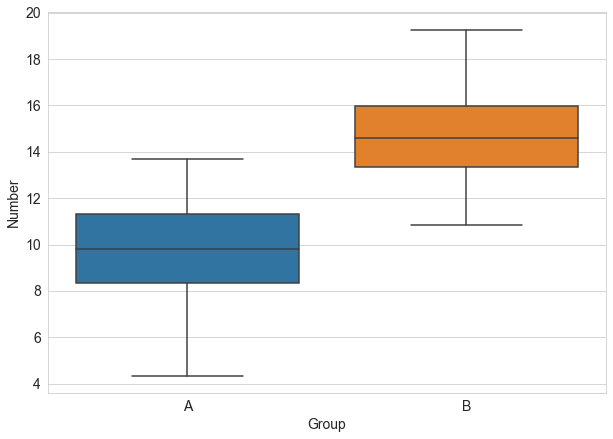

In [41]:
draw_whiskers(group_numbers)

In [42]:
observedStat, permutations = permutation_test(group_numbers=group_numbers)

observedStat: 5.059281864694716
pValue: 0.0


deviatia standard:  0.7148026616192956
quantila 2.5%: -1.3955770108890346
quantila 97.5%: 1.4267237151220642


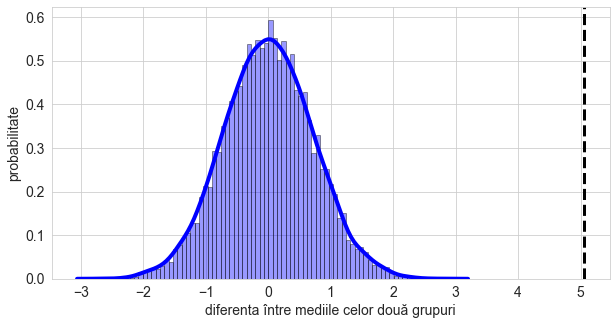

In [43]:
draw_plot(observedStat=observedStat, permutations=permutations)

In [44]:
# R. b)
group_numbers = get_numbers(dispersion=10)
group_numbers

,Group,Number
0,A,5.642197
1,A,13.583393
2,A,11.945279
3,A,-0.442220
4,A,35.293047
...,...,...
45,B,9.967475
46,B,29.299816
47,B,29.377676
48,B,13.584990


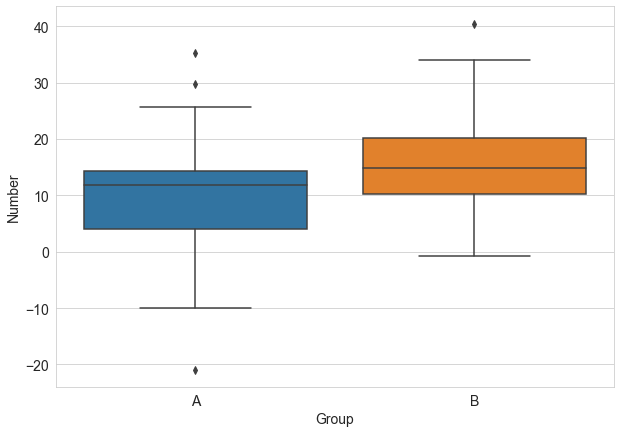

In [45]:
draw_whiskers(group_numbers)

In [46]:
observedStat, permutations = permutation_test(group_numbers=group_numbers)

observedStat: 5.732623482600813
pValue: 0.0023


deviatia standard:  2.1283070780384037
quantila 2.5%: -4.224900629076854
quantila 97.5%: 4.091424864790396


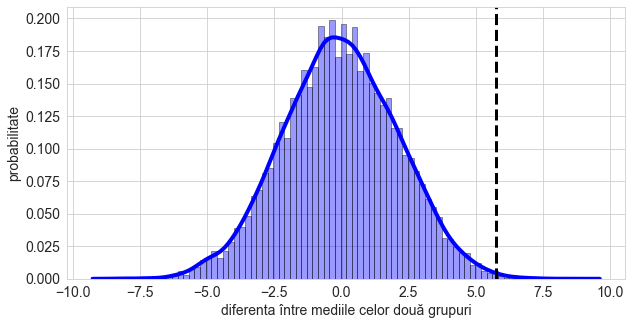

In [47]:
draw_plot(observedStat=observedStat, permutations=permutations)

In [48]:
# Am constatat ca diferenta mediilor a crescut.